In [1]:
############################
#
# INSTALLS
#
############################

#!pip install termcolor


In [2]:
############################
#
# IMPORTS
#
############################

import re
import IPython
from IPython.display import clear_output, Image, display
from termcolor import colored
import random
from random import randint

import ipywidgets as widgets


In [3]:
# define rooms and items

bureau = {
    "name": "bureau",
    "type": "furniture",
}

closet = {
    "name": "closet",
    "type": "furniture",
}

cabinet = {
    "name": "cabinet",
    "type": "furniture",
}

couch = {
    "name": "couch",
    "type": "furniture",
}

piano = {
    "name": "piano",
    "type": "furniture",
}

queen_bed = {
    "name": "queen bed",
    "type": "furniture",
}

double_bed = {
    "name": "double bed",
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

dining_table = {
    "name": "dining table",
    "type": "furniture",
}

pocket = {
    "name": "pocket",
    "type": "pocket"
}

door_a = {
    "name": "red door",
    "type": "door",
}

door_b = {
    "name": "blue door",
    "type": "door",
}

door_c = {
    "name": "green door",
    "type": "door",
}

door_d = {
    "name": "yellow door",
    "type": "door",
}

key_a = {
    "name": "red key",
    "type": "key",
    "target": door_a,
}

key_b = {
    "name": "blue key",
    "type": "key",
    "target": door_b,
}

key_c = {
    "name": "green key",
    "type": "key",
    "target": door_c,
}

key_d = {
    "name": "yellow key",
    "type": "key",
    "target": door_d,
}

chainshaw = {
    "name": "chainshaw",
    "type": "boost",
    "target": pocket
}

antidote = {
    "name": "outdated antidote",
    "type": "boost",
    "target": pocket
}

medkit = {
    "name": "medkit",
    "type": "boost",
    "target": pocket
}

game_room = {
    "name": "game room",
    "type": "room",
}

bedroom1 = {
    "name": "bedroom1",
    "type": "room",
}

bedroom2 = {
    "name": "bedroom2",
    "type": "room",
}

living_room = {
    "name": "living room",
    "type": "room",
}

outside = {
  "name": "outside"
}

def get_index(alist, elem):
    for i,itm in enumerate(alist):
        if itm["name"] == elem["name"]:
            return i
    return -1

boosts = [chainshaw,antidote,medkit]
def get_item():
    it = random.sample(boosts,1)[0]
    idx = get_index(boosts,it)
    boosts.pop(idx)
    return it

furnitures = [bureau,closet,cabinet]
def get_furniture():
    it = random.sample(furnitures,1)[0]
    idx = get_index(furnitures,it)
    furnitures.pop(idx)
    return it

all_rooms = [game_room, bedroom1, bedroom2, living_room, outside]

all_doors = [door_a,door_b,door_c,door_d]

# define which items/rooms are related

object_relations = {
    "game room": [couch, piano, door_a],
    "bedroom1": [queen_bed, door_a, door_b, door_c, get_furniture()],
    "bedroom2": [double_bed, dresser, door_b, get_furniture()],
    "living room": [dining_table, door_c, door_d, get_furniture()],
    "piano": [key_a],
    "queen bed": [key_b],
    "double bed": [key_c],
    "dresser": [key_d],
    "outside": [door_d],
    "red door": [game_room, bedroom1],
    "blue door": [bedroom1, bedroom2],
    "green door": [bedroom1, living_room],
    "yellow door": [living_room, outside],
    "bureau":[get_item()],
    "closet":[get_item()],
    "cabinet":[get_item()]
}

# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": outside
}

you_feel = {
    1:"You notice some pain at your belly... Why? You don't remember what you eated.",
    2:"You start to bleed, it smells bad, it is not a bad digestion",
    3:"You are bleeding, your look is dyed red, You hurry!",
    4:"You gonna die here, you know it, your time goes by...",
    5:"It's your last opportunity!!!",
    6:"GAME OVER, YOU DIED",
    7:"GOD MODE",
    8:"I gonna kill you! Bastard!"
}

def but_input(text):
    print(text)
    color_buttons = widgets.ToggleButtons(
        options=['explore', 'examine'],
        description='Color:',
    )
    color_buttons
    return color_buttons.value

In [4]:
colors = ['blue','red','green','yellow']
background = {'game room':'on_magenta','bedroom2':'on_blue','bedroom1':'on_red','living room':'on_green','outside':'on_yellow'}

class Color():
    '''
    This class manage all stuff for colors in text
    '''
    def __init__(self):
        pass
        
    def inn(self,text):
        for c in colors:
            if c in text:
                return colored(text,c)
        return text
            
    def c(self, text, color, back=None):
        if back:
            return colored(text, color, back)
        else:
            return colored(text, color)
        
    def back(self,text):
        return self.c(text,'white',background[text])
    
    def listin(self,alist):
        return [self.inn(itm) for itm in alist]
        
    
        
color = Color()
print(color.inn('is this blue?'))
print(color.inn('is this red?'))
print(color.c('posim dues','blue'))
print(color.c('posim dues','blue','on_grey'))

items = color.listin(colors)
print(','.join(items))

is this blue?
is this red?
posim dues
posim dues
blue,red,green,yellow


In [5]:
class Face():
    #This class represents a face.
    
    def __init__(self):
        pass
    
    def image(self,ext):
        if ext <1: ext =1
        return Image(filename =  "./doom0"+str(ext)+".png", width=100, height=100)

    
class Sound():
    def __init__(self):
        pass
    
    def play(self,file):
        IPython.display.display(IPython.display.Audio(url="./"+file,autoplay=True))
    
    def theme(self):
        IPython.display.display(IPython.display.Audio(url="./doom.aac",autoplay=True))


In [6]:
face = Face()
sound = Sound()

In [7]:
def header():
    display(Image(filename =  "./brief.png", width=270, height=250))
    sound.theme()

state = 1
step = 1
def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """    

    header()
    print("""You wake up on a couch and find yourself in a strange house with no windows which you have never 
    been to before. You don't remember why you are here and what had happened before. You feel a bad taste in
    your tongue. What's happened here? you want to get out of the house, NOW!""")
    
    explore_room(game_state["current_room"])
    play_room(game_state["current_room"])

def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either 
    explore (list all items in this room) or examine an item found here.
    """
    global state
    game_state["current_room"] = room
    display(face.image(state))
    print(you_feel[state])
    if(game_state["current_room"] == game_state["target_room"]):
        header()
        print("Congrats! You escaped the room!")
        global step
        if step > 0: msg = "BUT the ANTIDOTE was OUTDATED, you'll DIE!"
        else: msg="You have the ANTIDOTE!"
        raise SystemExit(msg)
    elif state == 6:
        header()
        print("Desolation! You fell to the PIT!")
        raise SystemExit("Brief DOOM Revisited by Jordi M. and folks")
    else:
        print("You are now in " + color.back(room["name"]))
        intended_action = input("What would you like to do?").strip()
        #intended_action = but_input("What would you like to do? Type 'explore' or 'examine'?")
        clear_output()
        if intended_action == "explore":
            explore_room(room)
            play_room(room)
        elif intended_action.startswith('examine '):
            ex = intended_action[-(len(intended_action)-8):]
            examine_item(ex)
        elif intended_action == "examine":
            examine_item(input("What would you like to examine?").strip())
        elif intended_action == "pocket":
            look_pocket(room)
        else:
            examine_item(intended_action)
            play_room(room)
        linebreak()

def look_pocket(room):
    '''
    print what you have in your inventory
    '''
    explore_room(room,1)
    items = [i["name"] for i in game_state["keys_collected"] ]
    items = color.listin(items)
    if len(items)==0:items.append('nothing')
    print("You look your pocket. You find " + ", ".join(items))
    play_room(game_state["current_room"])
        
def explore_room(room,stripe=None):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    items = color.listin(items)
    pres = 'You explore the room. ' if not stripe else ''

    print(pres+"This is " + color.back(room["name"]) + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            global state
            state += step
            if state < 1: state = 1
            sound.play('door'+str(randint(1, 3))+'.mp3')
            return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been 
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None
    
    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + color.inn(item_name) + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + color.inn(item_found["name"]) + "."
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break
    
    
    if(output is None):
        
        for item in game_state["keys_collected"]:
            if(item["name"] == item_name):
                if item['type']=='boost':
                    idx = get_index(game_state["keys_collected"],item)
                    item_found = game_state["keys_collected"].pop(idx)
                    global state, step
                    if item["name"] == 'medkit':
                        state += -2
                        output = "You feel better, but still ill"
                        sound.play('open.wav')
                    if item["name"] == 'outdated antidote':
                        it = random.sample([-1,1],1)[0]
                        step = it
                        output = "It looks like all gonna be better"
                        sound.play('open.wav')
                    if item["name"] == 'chainshaw':
                        output ="""BRAAAAMMM BRRRRR RRRRRR...."\n"You feel temporary better, you're well armed!"""
                        sound.play('chainshaw.mp3')
                        state += -1
                    break
                else:
                    output = "It's a pretty key, maybe will be enter in any hole :D"
            elif not output:
                output = "The item you requested is not found in the current room."
        
        print(output)

    if(next_room and have_key):
        
        explore_room(next_room)
        play_room(next_room)
    else:
        explore_room(current_room)
        play_room(current_room)

You examine yellow door. You unlock it with a key you have.
You explore the room. This is outside. You find yellow door


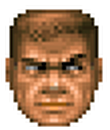

You notice some pain at your belly... Why? You don't remember what you eated.


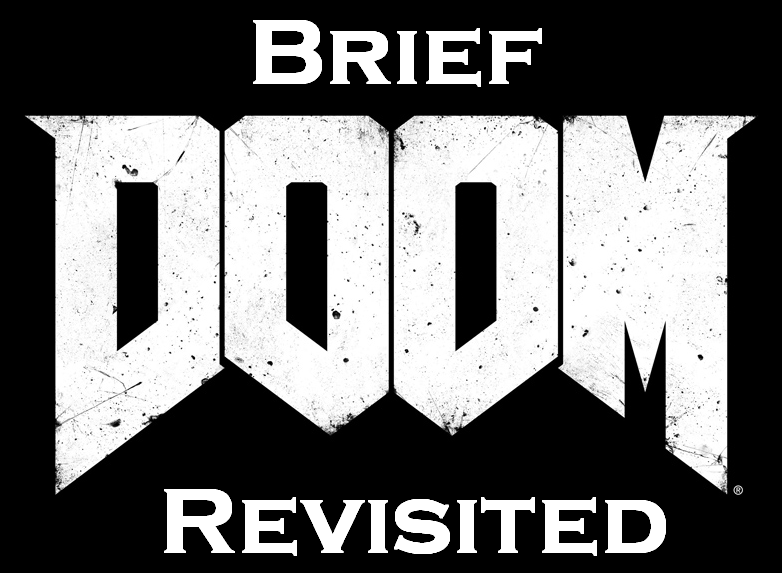

Congrats! You escaped the room!


SystemExit: You have the ANTIDOTE!

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
game_state = INIT_GAME_STATE.copy()

start_game()

# New Features List
- Ahora acepta comandos tipo '__examine piano__', sin hacer cada pregunta: examine + piano, también acepta el nombre del objeto, '__piano__'.

- Ahora si tienes la llave, ya pasas a la habitación sin preguntarte si quieres.

- Ahora al entrar en una habitación ya te hace una exploración inicial.

- Borrado de _output_.

- Ahora los textos que mencionan un color, se colorean así, tambien se colorean los nombres de las habitaciones, creado con la clase __Color__ + __termcolor__.

- Estado de salud según imagen, clase __Face__.

- Puedes ver tu inventario con '__pocket__' además puedes usar objetos escribiendo su nombre.

- Aleatoriedad de muebles con items '_boost_'

- Sistema de veneno + _boost_ = antidoto / _medkit_ / item.

- Música y efectos de sonido, clase __Sound__.

## Future work: 
- Aleatoriedad de las habitaciones
- Introducción de enemigos
- __roguelite__/__roguelike__.
